# Kaggle Titanic

In [60]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Import csv files
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

In [62]:
df1.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [63]:
df2.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [64]:
df1.shape

(891, 12)

In [65]:
df2.shape

(418, 11)

In [66]:
df2["Survived"]=np.nan

In [67]:
df2.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,NaN


In [68]:
df2.shape

(418, 12)

In [69]:
#combine two dataframes
titanic=pd.concat([df1,df2],axis=0,sort=False)

In [70]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
#Find the missing values 
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [72]:
#Eliminating missing value in Embarked
titanic.Embarked.mode()[0]

'S'

In [73]:
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [74]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [75]:
# Clean Fare columns
titanic.Fare=titanic.Fare.fillna(titanic.Fare.mean())
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [76]:
titanic.Age.median()

28.0

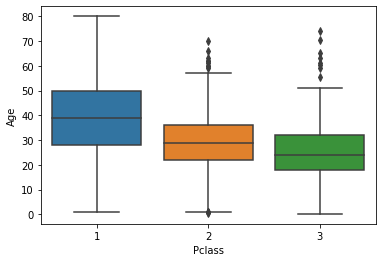

In [77]:
sns.boxplot(x="Pclass",y="Age",data=titanic)
plt.show()

In [78]:
titanic.groupby("Pclass").median()["Age"]

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [79]:
pclass1age=titanic.groupby("Pclass").median()["Age"][1]
pclass2age=titanic.groupby("Pclass").median()["Age"][2]
pclass3age=titanic.groupby("Pclass").median()["Age"][3]

In [80]:
titanic.loc[titanic["Pclass"]==1,"Age"]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
27     19.0
30     40.0
31      NaN
34     28.0
35     42.0
52     49.0
54     65.0
55      NaN
61     38.0
62     45.0
64      NaN
83     28.0
88     23.0
92     46.0
96     71.0
97     23.0
102    21.0
110    47.0
118    24.0
124    54.0
136    19.0
137    37.0
139    24.0
151    22.0
155    51.0
       ... 
308    55.0
314    55.0
316    57.0
323    33.0
324    39.0
327    46.0
331    39.0
335    30.0
343    58.0
350    45.0
355    50.0
356    59.0
364    25.0
368    45.0
371    31.0
372    49.0
374    54.0
375    45.0
378    55.0
390    23.0
391    51.0
395    18.0
397    48.0
400    30.0
402    22.0
403    17.0
404    43.0
407    50.0
411    37.0
414    39.0
Name: Age, Length: 323, dtype: float64

In [81]:
# Clean Age Pclass wise
titanic.loc[titanic["Pclass"]==1,"Age"]=titanic.loc[titanic["Pclass"]==1,"Age"].fillna(pclass1age)

titanic.loc[titanic["Pclass"]==2,"Age"]=titanic.loc[titanic["Pclass"]==2,"Age"].fillna(pclass2age)

titanic.loc[titanic["Pclass"]==3,"Age"]=titanic.loc[titanic["Pclass"]==3,"Age"].fillna(pclass3age)

titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [82]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


In [83]:
 titanic.Embarked

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
388    Q
389    S
390    S
391    S
392    S
393    S
394    S
395    S
396    Q
397    C
398    S
399    Q
400    S
401    S
402    C
403    S
404    C
405    C
406    S
407    C
408    Q
409    S
410    Q
411    Q
412    S
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 1309, dtype: object

In [84]:
emb=pd.get_dummies(titanic.Embarked,drop_first=True)
emb.tail(3)

,Q,S
415,0,1
416,0,1
417,0,0


In [85]:
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,NaN,C


In [86]:
sex=pd.get_dummies(titanic.Sex,drop_first=True)
sex.tail(3)

,male
415,1
416,1
417,1


In [87]:
titanic=pd.concat([titanic,emb,sex],axis=1)
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,male
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S,0,1,1
417,1309,NaN,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,NaN,C,0,0,1


In [88]:
titanic=titanic.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked","Cabin"],axis=1)
titanic.tail(3)

,Survived,Age,SibSp,Parch,Fare,Q,S,male
415,NaN,38.5,0,0,7.2500,0,1,1
416,NaN,24.0,0,0,8.0500,0,1,1
417,NaN,24.0,1,1,22.3583,0,0,1


In [90]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male
0,0.0,22.0,1,0,7.2500,0,1,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,1,0
3,1.0,35.0,1,0,53.1000,0,1,0
4,0.0,35.0,0,0,8.0500,0,1,1


In [93]:
titanicTrain=titanic.loc[titanic.Survived.notnull(),]
titanicTrain.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male
0,0.0,22.0,1,0,7.2500,0,1,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,1,0
3,1.0,35.0,1,0,53.1000,0,1,0
4,0.0,35.0,0,0,8.0500,0,1,1


In [95]:
titanicUnknown=titanic.loc[titanic.Survived.isnull(),]
titanicUnknown.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male
0,NaN,34.5,0,0,7.8292,1,0,1
1,NaN,47.0,1,0,7.0000,0,1,0
2,NaN,62.0,0,0,9.6875,1,0,1
3,NaN,27.0,0,0,8.6625,0,1,1
4,NaN,22.0,1,1,12.2875,0,1,0


In [98]:
X=titanicTrain.drop(["Survived"],axis=1)
X.head()

,Age,SibSp,Parch,Fare,Q,S,male
0,22.0,1,0,7.2500,0,1,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,1,0
3,35.0,1,0,53.1000,0,1,0
4,35.0,0,0,8.0500,0,1,1


In [101]:
y=titanicTrain.Survived
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [105]:
X_train.head()

,Age,SibSp,Parch,Fare,Q,S,male
392,28.0,2,0,7.9250,0,1,1
542,11.0,4,2,31.2750,0,1,0
730,29.0,0,0,211.3375,0,1,0
218,32.0,0,0,76.2917,0,0,0
737,35.0,0,0,512.3292,0,0,1


In [106]:
titanicUnknown.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male
0,NaN,34.5,0,0,7.8292,1,0,1
1,NaN,47.0,1,0,7.0000,0,1,0
2,NaN,62.0,0,0,9.6875,1,0,1
3,NaN,27.0,0,0,8.6625,0,1,1
4,NaN,22.0,1,1,12.2875,0,1,0


In [108]:
titanicUnknown=titanicUnknown.drop("Survived",axis=1)

In [109]:
titanicUnknown.head()

,Age,SibSp,Parch,Fare,Q,S,male
0,34.5,0,0,7.8292,1,0,1
1,47.0,1,0,7.0000,0,1,0
2,62.0,0,0,9.6875,1,0,1
3,27.0,0,0,8.6625,0,1,1
4,22.0,1,1,12.2875,0,1,0


In [110]:
from sklearn.datasets import load_boston

In [111]:
boston = load_boston()

In [121]:
pd.DataFrame(data=boston.data,columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
